<h2>Notes -- Image Processing with Python: Drawing Basic Shapes</h2>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [Drawing Shapes](#Img_Draw)<br>
2. [Creating a New Image for Drawing Shapes](#Img_Create)<br>
   [2.1 Creating an New Image from Scratch](#Img_Create_New)<br>
   [2.2  Note about Using Image Libraries to Create New Images](#Img_Create_Libs)<br>
3. [Drawing Basic Shapes on an Image](#Img_Shapes)<br>
   [3.1 Using cv2 to Draw Basic Shapes](#Img_Shapes_CV2)<br>
   [3.1.1 Creating a Image on which to Draw cv2 Shapes](#Img_CV2)<br>
   [3.1.2 Drawing Lines with cv2](#Img_Lines_CV2)<br>
   [3.1.3 Drawing Rectangles with cv2](#Img_Rectangles_CV2)<br>
   [3.1.4 Drawing Circles with cv2](#Img_Circles_CV2)<br>
   [3.1.5 Drawing Ellipses with cv2](#Img_Ellipses_CV2)<br>
   [3.1.6 Drawing Polygons with cv2](#Img_Polygons_CV2)<br>
   [3.1.7 Annotating an Image with cv2](#Img_Text_CV2)<br>
   [3.1.8 Drawing Shapes on an Existing Image with cv2](#Img_Existing_Shapes_CV2)<br>
   [3.2 Using PIL to Draw Basic Shapes](#Img_Shapes_PIL)<br>
   [3.2.1 Creating a Image on which to Draw PIL Shapes](#Img_PIL)<br>
   [3.2.2 Drawing Points with PIL](#Img_Points_PIL)<br>
   [3.2.3 Drawing Lines with PIL](#Img_Lines_PIL)<br>
   [3.2.4 Drawing Rectangles and Rounded Rectangles with PIL](#Img_Rectangles_PIL)<br>
   [3.2.5 Drawing Ellipses with PIL](#Img_Ellipses_PIL)<br>
   [3.2.6 Drawing Arcs, Chords and Pie Slices with PIL](#Img_Arcs_PIL)<br>
   [3.2.7 Drawing Polygons and Regular Polygons with PIL](#Img_Polygons_PIL)<br>
   [3.2.8 Annotating an Image with PIL](#Img_Text_PIL)<br>
   [3.2.9 Drawing Shapes on an Existing Image with PIL](#Img_Existing_Image_PIL)<br>
   [3.3 Using skimage to Draw Basic Shapes](#Img_Shapes_SK)<br>
   [3.3.1 Creating a Image on which to Draw skimage Shapes](#Img_SK)<br>
   [3.3.2 Drawing Lines with skimage](#Img_Lines_SK)<br>
   [3.3.3 Drawing Rectangles with skimage](#Img_Rectangles_SK)<br>
   [3.3.4 Drawing Circle_Perimeters and Disks with skimage](#Img_Circles_SK)<br>
   [3.3.5 Drawing Ellipses with skimage](#Img_Ellipses_SK)<br>
   [3.3.6 Drawing Polygons with skimage](#Img_Polygons_SK)<br>
   [3.3.7 Annotating an skimage Image with Text](#Img_Text_SK)<br>
   [3.3.8 Drawing Shapes on an Existing Image with skimage](#Img_Existing_Image_SK)<br>
4. [Concluding Remarks](#Remarks)<br>

<h3>0. Initial Setup</h3>

Routines that control the screen scrolling, fronted display, and definition of all libraries used throughout the notebook.

In [1]:
# enable all interactive output to be 'printed'
# and disable scrolling so long output can be displayed w/o scroll bars

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import Image, display

#template for displaying/embedding external image in juypter notebook
#display(Image(filename='images/lion.jpg', embed=True))

In [4]:
# common libraries and functions used with image libraries

# The Python 'os' module 'provides functions for interacting with the operating system'
# Here we'll use it to determine the current working directory
import os

# numpy library provides extensive array processing capabilities
import numpy as np

import math

# random number generator
import random as rnd

# The sckit-image library (or package)
# 'io' is subpackage used for 'reading, saving, and displaying images and video'
import skimage
import skimage.io as skio
from skimage.draw import line, rectangle, rectangle_perimeter
from skimage.draw import circle_perimeter, disk
from skimage.draw import ellipse, ellipse_perimeter, bezier_curve
from skimage.draw import line_aa, circle_perimeter_aa
from skimage.draw import polygon, polygon_perimeter
from skimage.draw import set_color

# The opencv library
import cv2

# the PIL image library
#from PIL import Image
import PIL
from PIL import Image, ImageDraw, ImageOps, ImageFont

# PyLab is a procedural interface to the Matplotlib object-oriented plotting library. 
# Matplotlib is the whole package; matplotlib.pyplot is a module in Matplotlib;
# and PyLab is a module that gets installed alongside Matplotlib.
import pylab as pl

# The colormap library provides a number of methods that can be used to convert
# one representation to another
from colormap.colors import hex2rgb, rgb2hex

# Depending on the library Matplotlib will often be employed to display the image
# The 'inline' setting is used to display an image within the jupyter notebook rather 
# than in a separate window

from matplotlib import pyplot as plt
from matplotlib import image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
%matplotlib inline

# use matpltlib show to display
# but with the axis labels turned off 

def img_show(img, show_axes = None):
    if show_axes == "off" or show_axes == "no":    
        plt.axis("off")
    plt.imshow(img)
    plt.show(); # ';' suppresses extraneous printing

# The name and path of the file containing the lion.png file image
# which will be used to illustrate the various code snippets

wdir = "C:\Jupyter_Files\Computer_Image_Processing_and_Vision"
img_file = wdir + '\images\lion.jpg'

import warnings
warnings.filterwarnings("ignore")

<a class="anchor" id="Img_Draw"></a>
<h3>1. Drawing Shapes</h3>
<a href='#toc'>Return to TOC</a>

In this notebook we'll primarily explore and exemplify how to draw basic shapes (e.g. lines, ellipses, rectangles, polygons, etc.) on new and existing images using modules from three of the major Python image libraries including cv2, PIL and sci-kit image (skimage). While these capabilities pale in comparison to the drawing capabilities of a language like Processing/P5.js, they are more than sufficient to:

<ul>
    <li>highlight various objects or aspects in the image</li>
    <li>eliminate or modify various aspects of an image</li>
    <li>annotate an image</li>
</ul>

<a class="anchor" id="Img_Create"></a>
<h3>2. Creating a New Image for Drawing Shapes</h3>
<a href='#toc'>Return to TOC</a>

Before we can draw a shape on an image, we have to have an image to draw on. One way to do this is to start with an existing image. Another way is to create a new image from scratch. In this notebook will illustrate both methods.

<a class="anchor" id="Img_Create_New"></a>
<h4>2.1 Creating an New Image from Scratch</h4>
<a href='#toc'>Return to TOC</a>

The simplest way to create a new image to serve as a canvas on which to 'draw' is to:

<ol>
    <li>define the shape of the image which includes height, width and color channels (none, 3, or 4)</li>
    <li>select a color by specifying a grayscale integer (between 0-255) or an rbg tuple (r, g, b)</li>
    <li>use 'numpy.full or 'numpy.zeros' to create an array of the specified size filled with the specified color</li>
</ol>

Once the numpy array has been created, it can be displayed or shown in a variety of ways.  Even though each of the major image libraries provides display capabilities (e.g. cv2's 'imshow', we're going to focus on images that are numpy arrays and use 'matplotlib' capabilities for display purposes.

The code below provides four examples of the process.

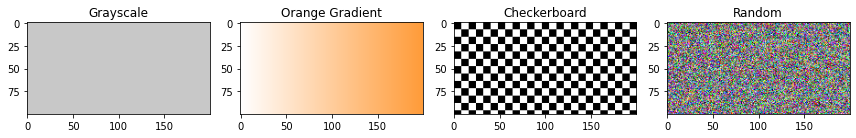

In [5]:
# create img (i.e. numpy array)
# fill image with single grayscale color or an rbg tuple

h,w = 100,200 # shape
half_h, half_w = int(h/2), int(w/2)

# grayscale rectangle - no channel dimension in the array
colr_gray = 200
img_gray = np.zeros ((h,w), dtype = "uint8") + colr_gray

# solid orange gradiant rectangle - 4 channels R,G,B,Alpha
colr_orng = (255,127,0,255) #orange
img_orange = np.full((h, w, 4), colr_orng, dtype=np.uint8)
for x in range(200):
    for y in range(100):
        img_orange[y, x, 3] = x

# checkerboard rectangle - no channel dimension in array
img_checkerboard = np.zeros ((h,w), dtype = "uint8")
# Set grey value to black or white depending on c position
for c in range(w):
    for r in range(h):
        if (c % 16) // 8 == (r % 16) // 8:
            img_checkerboard[r, c] = 0
        else:
            img_checkerboard[r, c] = 255

# random color rectangle
img_rand = np.zeros((h,w,3), dtype = "uint8")
for r in range(h):
    for c in range(w):
        colrs = [rnd.randint(0,256),rnd.randint(0,256),rnd.randint(0,256)]
        img_rand[r,c] = colrs

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(12, 3))
ax0.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
ax0.set_title("Grayscale")
ax1.imshow(img_orange);
ax1.set_title("Orange Gradient")
ax2.imshow(img_checkerboard, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Checkerboard")
ax3.imshow(img_rand)
ax3.set_title("Random")
fig.tight_layout();


<a class="anchor" id="Img_Create_Libs"></a>
<h4>2.2 Note about Using Image Libraries to Create New Images</h4>
<a href='#toc'>Return to TOC</a>

Both the 'skimage' and 'cv2' image libraries can work directly with new images created with numpy operations. On the other hand, the PIL image library cannot work directly with numpy arrays because the structure and coordinate system of a PIL image is unique to the PIL library.  For this reason it provides its own method for creating new images, i.e., 'PIL.Image.new'. Fortunately, it also provides the means to convert a numpy image array into a PIL image using 'PIL.Image.fromarray. Both methods are described below.

When would you use one or the other of these methods? Fortunately, it is relatively easy to move back and forth between the two as the situation demands. 'Image.fromarray' enables conversion from a numpy image to a PIL image.  Likewise, 'np.asarray' enables conversion from PIL image to numpy (array) image.

Creating image using PIL :
Type of PIL image: <class 'PIL.Image.Image'>
Size of PIL image: (200, 100)

Creating image by converting numpy array to PIL:
Type of numpy image: <class 'numpy.ndarray'>
Shape of numpy image: (100, 200, 3)

Type of PIL image: <class 'PIL.Image.Image'>
Size of PIL image: (200, 100)


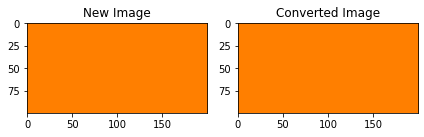

In [6]:
# Creating a new PIL image from scratch vs. by converting numpy array

h,w = 100,200
colr_orng = (255,127,0) #orange

# from scratch
print("Creating image using PIL :")

img_orange_PIL = PIL.Image.new('RGB', (w, h), colr_orng) #notice w,h reversal

print("Type of PIL image: {}".format(type(img_orange_PIL)))
print("Size of PIL image: {}\n".format(img_orange_PIL.size))

# by converting numpy array
print("Creating image by converting numpy array to PIL:")

img_orange_np = np.full((h, w, 3), colr_orng, dtype=np.uint8)
img_orange_np_PIL = Image.fromarray(img_orange_np,"RGB")

print("Type of numpy image: {}".format(type(img_orange_np)))
print("Shape of numpy image: {}\n".format(img_orange_np.shape))
print("Type of PIL image: {}".format(type(img_orange_np_PIL)))
print("Size of PIL image: {}".format(img_orange_np_PIL.size))

# display images
draw_1 = ImageDraw.Draw(img_orange_PIL)
draw_2 = ImageDraw.Draw(img_orange_np_PIL)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 3))
ax0.imshow(img_orange_PIL)
ax0.set_title("New Image")
ax1.imshow(img_orange_np_PIL)
ax1.set_title("Converted Image")
fig.tight_layout();


<a class="anchor" id="Img_Shapes"></a>
<h3>3. Drawing Basic Shapes on an Image</h3>
<a href='#toc'>Return to TOC</a>

All three of the major image libraries - 'cv2','PIL', and 'skimage' can be used to draw a relative small number of basic shapes on an image, existing or new. Among the shapes provided by the libraries are:

<ul>
    <li>cv2 -- line, rectangle, circle, ellipse, polygon</li><br>
    <li>PIL -- point, line, rectangle, rounded_rectangle, polygon, regular_polygon, circle, ellipse, arc, chord, pieslice</li><br>
    <li>skimage -- bezier_curve, circle_perimeter, circle_perimeter_aa, disk, ellipse, ellipse_perimeter, ellipsoid, ellipsoid_stats, line, line_aa, line_nd, polygon, polygon2mask, polygon_perimeter, random_shapes, rectangle, rectangle_perimeter</li><br>
</ul>
    
On the surface, it appears as if 'skimage' has more capabilities than 'PIL' which has more than 'cv2'. However, looks can be deceiving. First, many of the individual shapes provided by 'skimage' and 'PIL' are simply variants of one another. For instance, with 'PIL' circle, ellipse, arc, chord and pieslices are variants of one another. Likewise, with 'skimage line, line_aa, and line_nd are also variants. In contrast 'cv2' provides a number of parameters for each of it's shapes that offer similar capabilities. Second, many of the shapes produced by 'skimage' are hard to see in large part because there is no way to control then thickness of the perimeter of the shape. Third, the collections of shapes provided by all of them is fairly primitive. Rarely, would anyone use these capabilities to produce even a moderately complex data visualization. The virtue of the shapes is that they enable us to annotate or highlight various aspects of the images being processed without relying on other modules.

<a class="anchor" id="Img_Shapes_CV2"></a>
<h4>3.1 Using cv2 to Draw Basic Shapes</h4>
<a href='#toc'>Return to TOC</a>

cv2 supports the drawing of a handful of basic shapes including:
    
<ul>
    <li>cv2.line(img, start_coordinates, end_coordinates, color, thickness):
    <li>cv2.rectangle(img, start_coordinates, end_coordinates, color, thickness)</li>
    <li>cv2.circle(img, center, radius, color, thickness)</li>
    <li>cv2.ellipse(img, center, axes, angle, rotation_angle, start_angle, end_angle, color, thickness=1)</li>
    <li>cv2.polylines(img, array_coordinates, closed_flag, color, thickness)
</ul>

where

<ul>
    <li>img -- image on which shape(s) are drawn</li>
    <li>start_coordinates -- starting point tuple (for rectangle upper-left corner)</li>
    <li>end_coordinates -- ending point tuple (for rectangle lower-right corner)</li>
    <li>color - stroke color of shape in BGR</li>
    <li>thickness -- stroke thickness of shape (if = -1, then it fills the shape)</li>
    <li>center -- tuple defining center point of shape</li>
    <li>radius -- radius of circle</li>
    <li>rotation_angle -- rotation angle of the ellipse (calculated counterclockwise) -- determines the starting angle of the major/minor axes with respect to the center of the ellipse.</li>
    <li>start_angle -- starting angle (calculated clockwise) -- specifies rotation angle of the ellipse arc where the outline of the ellipse will start to be drawn.</li>
    <li>end_angle -- final angle (calculated clockwise) -- specifies the rotation angle of the ellipse arc where the outline of the ellipse will start to be drawn. </li>
    <li>array_coordinates -- np.array of coordinates defining polygon (i.e. [[y1,x1]...[yM,xN]])</li>
</ul>

Each of these shapes is illustrated below.

<a class="anchor" id="Img_CV2"></a>
<h5>3.1.1 Creating a Image on which to Draw cv2 Shapes</h5>
<a href='#toc'>Return to TOC</a>

As a first step in the overall process, we've created a 200x400 numpy array of gray pixels to represent a image on which to draw the various shapes. We've labeled this array 'img_gray_cv2'.  As before, the corners of this array are designated (clockwise) as:

<ul>
    <li>upper-left: img_gray_cv2[0,0]</li>
    <li>upper-right: img_gray_cv2[0,399]</li>
    <li>lower-left: img_gray_cv2[199,399]</li>
    <li>upper-left: img_gray_cv2[199,0]</li>
</ul>

Gray image using numpy zeros array
shape -- rows by cols: (200, 400, 3)
height = 200
width = 400


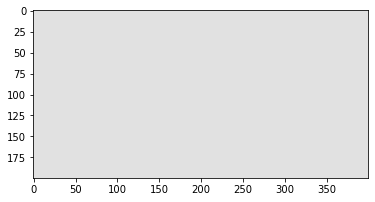

In [7]:
# numpy array to be used as the image
# light shade of gray used so that the image is easily seen
print("Gray image using numpy zeros array")
colr_gray = (225,225,225)
img_gray_cv2 = np.zeros ((200,400,3), dtype = "uint8") + colr_gray
print("shape -- rows by cols: {}".format(img_gray_cv2.shape))
print("height = {}".format(img_gray_cv2.shape[0]))
print("width = {}".format(img_gray_cv2.shape[1]))

plt.imshow(img_gray_cv2);
#plt.axis('off')

<a class="anchor" id="Img_Lines_CV2"></a>
<h5>3.1.2 Drawing Lines with cv2</h5>
<a href='#toc'>Return to TOC</a>

On the surface drawing a line in cv2 is straight forward. So, let's draw a line from the upper-left corner \[0,0\] to the lower-right corner \[199,399\].

Drawing cv2 line from corner to corner


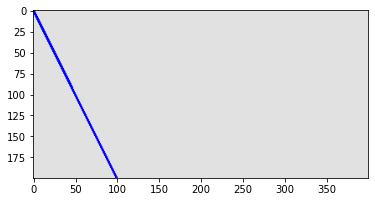

In [8]:
# cv2.line(img, start_coordinates, end_coordinates, color, thickness)

# parameters
img = img_gray_cv2.copy() # using a copy so we don't overwrite the image

start = (0,0) # this is the upper-left corner of the array
end = (199,399) # this is the lower-left corner of the array
colr = (0,0,255) #lightblue
thick = 2

# line
cv2.line(img, start, end, colr, thick)

# display
print("Drawing cv2 line from corner to corner")
plt.imshow(img);

So, what's wrong with this picture? Couple of things.

First, as if the image coordinate system weren't confusing enough, cv2 shapes are drawn on an image where the pixels are designated as (x,y) tuples rather than the (y,x) tuples found in the images we've been working with. Thus, for instance, the corners in the world of cv2 shapes are designated: upper-left - (0,0), upper-right - (399,0), lower-right - (199,399), and lower-left - (0,199). 

Second, cv2 is happy to draw from one point to the next regardless of whether the point is on the screen or not. So, what cv2 did was draw to a theoretical end point of x = 199 and y = 399, even though a y = 399 does not exist (at least on the image we're looking at). The obvious, although perplexing, conclusion is that when we specifying a 'line', or any other cv2 shape for that matter, we use (x,y) coordinates where x is the number of columns and y is the number of rows where the origin (0,0) is still the upper-left corner. This is what is done below for all the remaining shapes.

Drawing cv2 lines from corner to corner


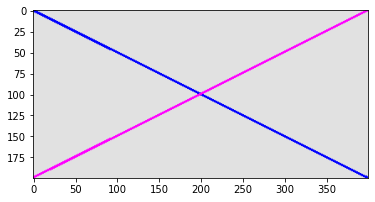

In [9]:
# cv2.line(img, start_coordinates, end_coordinates, color, thickness)
# with correct (x,y) coordinates

img = img_gray_cv2.copy() # using a copy so we don't overwrite the image

# parameters
start_1 = (0,0) # this is the upper-left corner of the array
end_1 = (399,199) # this is the lower-left corner of the array
start_2 = (399,0) # this is the upper-right corner of the array
end_2 = (0,199) # this is the lower-left corner of the array
blue = (0,0,255)
magenta = (255,0,255)
thick = 2

# diagonal from upper-left to lower-right
cv2.line(img, start_1, end_1, blue, thick)

# diagonal from upper-right to lower-left
cv2.line(img, start_2, end_2, magenta, thick)

# display
print("Drawing cv2 lines from corner to corner")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Rectangles_CV2"></a>
<h5>3.1.3 Drawing Rectangles with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing cv2 rectangles


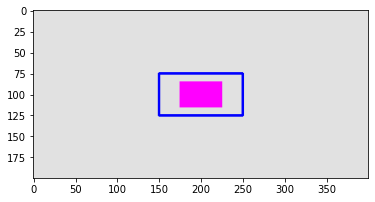

In [10]:
# drawing a cv2 rectangle (in center of the screen)
# cv2.rectangle(img, start_coordinates, end_coordinates, color, thickness)

# parameters
img = img_gray_cv2.copy() # using a copy so we don't overwrite the image

# outer rectangle - outline only
center = (int(400/2), int(200/2)) # center of 400x200 image
start = (center[0]-50, center[1]-25)
end = (center[0]+50, center[1]+25)
thick = 2
cv2.rectangle(img, start, end, blue, thick)

#inner rectangle - filled
start = (center[0]-25, center[1]-15)
end = (center[0]+25, center[1]+15)
cv2.rectangle(img, start, end, magenta, -1)

# display
print("Drawing cv2 rectangles")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Circles_CV2"></a>
<h5>3.1.4 Drawing Circles with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing cv2 circle of radius=75 in center of img
Note: When thickness = -1, it fills the shape


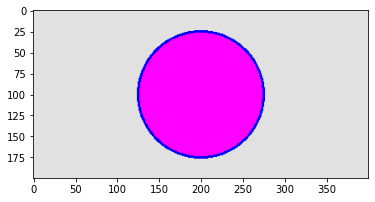

In [11]:
# drawing a cv2 circle (in center of the screen)
# cv2.circle(img, center, radius, color, thickness)

img = img_gray_cv2.copy() # using a copy so we don't overwrite the image

# parameters
center = (int(400/2), int(200/2)) # center of 400x200 image
radius = 75
thick = -1
print("Drawing cv2 circle of radius=75 in center of img")
print("Note: When thickness = -1, it fills the shape")
cv2.circle(img, center, radius, magenta, thick)
# adding blue perimeter
thick = 2
cv2.circle(img, center, radius, blue, thick)

# display
plt.imshow(img);  

<a class="anchor" id="Img_Ellipses_CV2"></a>
<h5>3.1.5 Drawing Ellipses with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing multiple cv2 ellipses


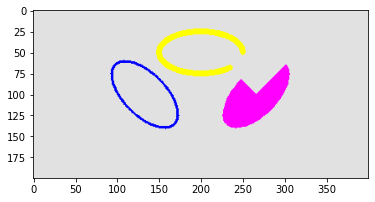

In [12]:
# drawing 3 cv2 ellipses
# cv2.ellipse(img, center, axes, rotation_angle, start_angle, end_angle, color, thickness)
# actually the cv2 definition of ellipse is more equivalent to other libraries defintions
# of an arc. 

img = img_gray_cv2.copy()

# parameters first ellipse
center_1 = (133,100)
axes_1 = (50,25)
rotation_angle_1 = 45
start_angle_1 = 0
end_angle_1 = 360
colr_1 = (0, 0, 255) # blue
thick_1 = 2

# parameters second ellipse
center_2 = (266,100)
axes_2 = (50,25)
rotation_angle_2 = -45
start_angle_2 = 0
end_angle_2 = 270
colr_2 = (255,0,255) # magenta
thick_2 = -1

# parameters third ellipse
center_3 = (200,50)
axes_3 = (50,25)
rotation_angle_3 = 0
start_angle_3 = 45
end_angle_3 = 360
colr_3 = (255, 255, 0) 
thick_3 = 6

# draw shapes

print("Drawing multiple cv2 ellipses")
cv2.ellipse(img, center_1, axes_1, rotation_angle_1, start_angle_1, end_angle_1, colr_1, thick_1)
cv2.ellipse(img, center_2, axes_2, rotation_angle_2, start_angle_2, end_angle_2, colr_2, thick_2)
cv2.ellipse(img, center_3, axes_3,  rotation_angle_3, start_angle_3, end_angle_3, colr_3, thick_3)
plt.imshow(img);

<a class="anchor" id="Img_Polygons_CV2"></a>
<h5>3.1.6 Drawing Polygons (Polylines) with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing cv2 polygons with polylines


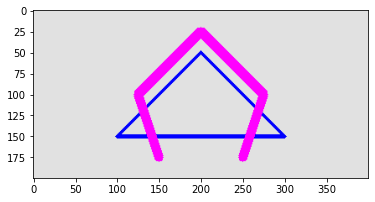

In [13]:
# drawing a cv2 polygon
# cv2.polylines(img, array_coordinates, closed_flag, color, thickness)
# the array coordinates define the points of the polygon and the order in which they will be drawn
# unlike the other shapes polylines does not support thickness = -1, so there is not direct way to 
# fill a polyline shape

img = img_gray_cv2.copy()

# parameters of first polygon
array_coordinates_1 = np.array([[200,50],[300,150],[100,150]], np.int32)
closed_flag_1 = True
colr_1 = blue
thickness_1 = 3

# parameters of second polygon
array_coordinates_2 = np.array([[150,175],[125,100],[200,25],[275,100],[250,175]], np.int32)
closed_flag_2 = False
colr_2 = magenta
thickness_2 = 10

print("Drawing cv2 polygons with polylines")
cv2.polylines(img, [array_coordinates_1], closed_flag_1, colr_1, thickness_1)
cv2.polylines(img, [array_coordinates_2], closed_flag_2, colr_2, thickness_2)
plt.imshow(img);

<a class="anchor" id="Img_Text_CV2"></a>
<h5>3.1.7 Annotating an Image with cv2</h5>
<a href='#toc'>Return to TOC</a>

cv2 provides a method - putText - for annotating images with text. The structure of the method is:

    cv2.putText(image, text, org, fontFace, fontScale, color)
    
where the parameters are:

<ul>
    <li>image -- the image being annotated</li>
    <li>text -- a string of text</li>
    <li>org -- tuple denoting the location of the lower-left corner of the text. Unfortunately, while the image itself is stuctured as (y,x), this tuple is specified as (x,y) where x is the column and y is the row.</li>
    <li>fontFace -- font type to be used with the text. Here the font type is restricted to the 'HERSHEY' family. A listing of the faces that are supported are found at: https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html</li>
    <li>fontScale -- a floating point number determining the relative size of the font</li>
    <li>color -- either a single number (grayscale), a 3 channel RGB tuple, or a 4 channel RGBA tuple</li>
</ul>

(200, 400, 3)


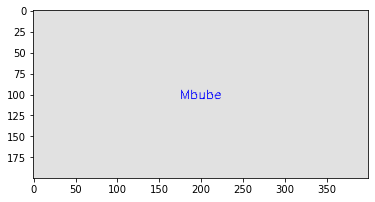

In [14]:
# annotating an image with cv2 putText

img_cv2 = img_gray_cv2.copy() 
print(img_cv2.shape)
text = 'Mbube'
org = (175,105) # x, y text location -- this requires a bit of trial and error
cv2.putText(img_cv2, text, org, fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5,  color = (0,0,255))
plt.imshow(img_cv2);

<a class="anchor" id="Img_Existing_Shapes_CV2"></a>
<h5>3.1.8 Drawing Shapes on an Existing Image with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing shapes on an existing image is the same as drawing shapes on a newly defined image. Once it is read from a file with cv2.imread and assigned a variable name, it is converted to a numpy array that can be manipulated as if it were created from scratch. 

To illustrate this fact, let's use a couple of ellipses to highlight the head and face of the Lion.jpg file used in the previous notebook. First, we'll read the file and display it. Then, we'll use the ellipses for highlighting

Drawing Shapes on an Existing Image
Existing Image File: 
<class 'tuple'> (175, 325, 3)


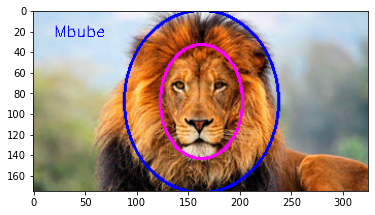

In [15]:
print("Drawing Shapes on an Existing Image")

#from matplotlib import image
print("Existing Image File: ".format(img_file))
img = image.imread(img_file)
img_cv2 = img.copy()
print(type(img_cv2.shape), img_cv2.shape)
      
text = "Mbube"
org = (20,25) # text location
cv2.putText(img_cv2, text, org, fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 0.5,  color = (0,0,255))

cv2.ellipse(img_cv2, (163,88), (55,40), 90, 0, 360, magenta, 2) #encompasses the inner face of the lion
cv2.ellipse(img_cv2, (163,88), (88,75), 90, 0, 360, blue, 2) #enconpasses much of the outer head of the lion
plt.imshow(img_cv2);
#plt.axis('off')

<a class="anchor" id="Img_Shapes_PIL"></a>
<h4>3.2 Using PIL to Draw Basic Shapes</h4>
<a href='#toc'>Return to TOC</a>

According to the <a href="https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html">PIL reference</a>, the PIL 'ImageDraw' module "provides simple 2D graphics for Image objects. You can use this module to create new images, annotate or retouch existing images, and to generate graphics on the fly for web use." The graphics or shapes that are supported include:
    
<ul>
    <li>PIL.ImageDraw.point(xy, fill=None) -- individual points at given coordinates.</li>
    <li>PIL.ImageDraw.line(xy, fill=None, width=0, joint=None) -- one or more lines between adjacent coordinates</li>
    <li>PIL.ImageDraw.rectangle(xy, fill=None, outline=None, width=1) - a rectangle defined by the upper-left and lower-right coordinates</li>
    <li>PIL.ImageDraw.rounded_rectangle(xy, radius, fill=None, outline=None, width=1) -- a rectangle with rounded corners where curve is determined by the radius (of the corners). </li>
    <li>PIL.ImageDraw.arc(xy, start, end, fill=None, width=0) -- outline of a partial ellipse.</li>
    <li>PIL.ImageDraw.chord(xy, start, end, fill=None, outline=None, width=1) -- same as an arc with endpoints connected by a straight line.</li>=None
    <li>PIL.ImageDraw.ellipse(xy, fill=None, outline=None, width=1) -- ellipse defined by bounded box.</li>
    <li>PIL.ImageDraw.pieslice(xy, start, end, fill=None, outline=None, width=1) -- same as arc with the end points connected by a straight line to the center of the 'pie'.</li>
    <li>PIL.ImageDraw.polygon(xy, fill=None, outline=None) -- straight lines between successive coordinates of the polygon and and a line between the first and last coordinates.</li>
    <li>PIL.ImageDraw.regular_polygon(bounded circle, n-sides, rotation=0, fill=None, outline=None) -- polygon inscribed in a bounded circle with n-sides and a rotation of specied degrees.</li>
</ul>

where

<ul>
    <li>xy -- array of ordered tuples or a list of ordered coordinates separated by commas or the upper-left and lower-right corners of a bounded box</li>
    <li>fill -- fill color, the default is None.</li>
    <li>outline -- color of the outer edge of the shape, the default is None.</li>
    <li>width -- stroke thickness of the outer edge of the shape, the default is 0 or 1.</li>
    <li>joint -- Joint type between a sequence of lines. It can be "curve", for rounded edges, or None (by default).</li>
    <li>radius -- distance from the center of the shape to the edge or the curvature of a corner.</li>
    <li>start -- starting angle in degrees with angle measured from 3 o’clock, increasing clockwise.</li>
    <li>end -- ending angle in degrees with angle measured from 3 o’clock, increasing clockwise../li
    <li>bounded circle -- a tuple defined by a point and radius. (e.g. bounding_circle is (x, y, r) or ((x, y), r)). The polygon is inscribed in this circle.</li>
    <li>n-sides -- number of sides of a polygon</li>
    <li>rotation -- arbitrary angle of rotation of a polygon
</ul>

Each of these shapes is illustrated below. Again, we'll start with a gray image only slightly lighter than the one used for cv2 shapes)

<a class="anchor" id="Img_PIL"></a>
<h5>3.2.1 Creating a Image on which to Draw PIL Shapes</h5>
<a href='#toc'>Return to TOC</a>

Type image: <class 'PIL.Image.Image'>
Size - cols by rows: (400, 200)


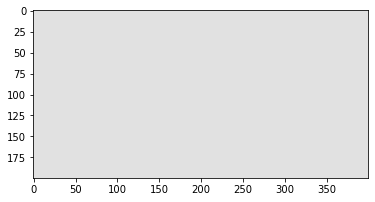

In [16]:
#from PIL import ImageDraw, Image

img_gray_PIL = PIL.Image.new('RGB', (400, 200), colr_gray)
draw = ImageDraw.Draw(img_gray_PIL)
print("Type image: {}".format(type(img_gray_PIL)))
print("Size - cols by rows: {}".format(img_gray_PIL.size))
plt.imshow(img_gray_PIL);

<a class="anchor" id="Img_Points_PIL"></a>
<h5>3.2.2 Drawing Points with PIL</h5>
<a href='#toc'>Return to TOC</a>

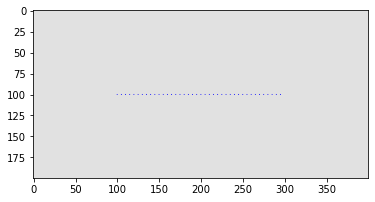

In [17]:
# PIL.ImageDraw.point(xy, fill=None)

img = img_gray_PIL.copy()
draw = ImageDraw.Draw(img)
for i in range(100,300,5):
    draw.point((i, 100), fill=(0,0,255))
#print("Drawing points with PIL")
plt.imshow(img)

<a class="anchor" id="Img_Lines_PIL"></a>
<h5>3.2.3 Drawing Lines with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing lines from corner to corner with PIL


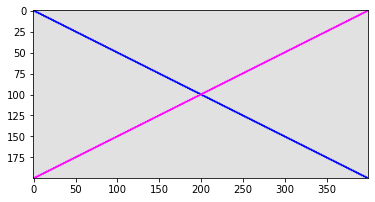

In [18]:
#PIL.ImageDraw.line(xy, fill=None, width=0, joint=None)

img = img_gray_PIL.copy()
draw = ImageDraw.Draw(img)
draw.line((0, 0, 400, 200), fill=(0,0,255), width=3) #blue line
draw.line((400, 0, 0, 200), fill=(255,0,255), width=3) #magenta line
print("Drawing lines from corner to corner with PIL")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Rectangles_PIL"></a>
<h5>3.2.4 Drawing a Rectangle and Rounded Rectangle with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing a rectangle and rounded_rectangle with PIL


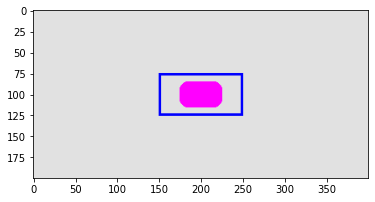

In [19]:
# PIL.ImageDraw.rectangle(xy, fill=None, outline=None, width=1) 
# PIL.ImageDraw._rounded_rectangle(xy, radius, fill=None, outline=None, width=1)

img = img_gray_PIL.copy()
draw = ImageDraw.Draw(img)
centerX = 200
centerY = 100
draw.rectangle((centerX-50,centerY-25,centerX+50,centerY+25), outline = (0,0,255), width=3) #blue
draw.rounded_rectangle((centerX-25,centerY-15,centerX+25,centerY+15), radius=10, fill = (255,0,255), width=3) #magenta
print("Drawing a rectangle and rounded_rectangle with PIL")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Ellipses_PIL"></a>
<h5>3.2.5 Drawing Ellipses with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing ellipses with PIL


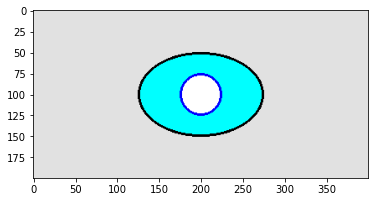

In [20]:
# PIL.ImageDraw.ellipse(xy, fill=None, outline=None, width=1)

img = img_gray_PIL.copy()
draw = ImageDraw.Draw(img)
centerX = 200
centerY = 100
draw.ellipse((centerX-75,centerY-50,centerX+75,centerY+50), fill = (0,255,255), outline = (0,0,0), width=3)
draw.ellipse((centerX-25,centerY-25,centerX+25,centerY+25), fill = (255,255,255), outline = (0,0,255), width=3)
print("Drawing ellipses with PIL")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Arcs_PIL"></a>
<h5>3.2.6 Drawing Arcs, Chords and Pie Slices with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing an arc, chord, and pieslice with PIL


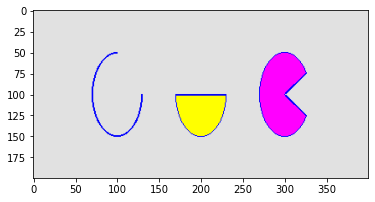

In [21]:
# PIL.ImageDraw.arc(xy, start, end, fill=None, width=0)
# PIL.ImageDraw.chord(xy, start, end, fill=None, outline=None, width=1)
# PIL.ImageDraw.pieslice(xy, start, end, fill=None, outline=None, width=1)

img = img_gray_PIL.copy()
draw = ImageDraw.Draw(img)
draw.arc((70,50,130,150), 0, 270, fill = (0,0,255), width=2)
draw.chord([(170,50),(230,150)], 0, 180, fill = (255,255,0), outline = (0,0,255), width=1)
draw.pieslice([(270,50),(330,150)], 30, 330, fill = (255,0,255), outline = (0,0,255), width=1)
print("Drawing an arc, chord, and pieslice with PIL")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Polygons_PIL"></a>
<h5>3.2.7 Drawing Polygons and Regular Polygons with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing Polygons and Regular Polygons with PIL


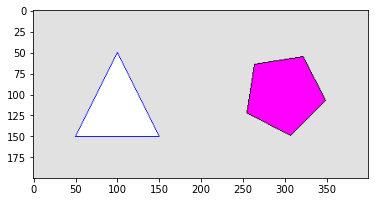

In [22]:
# PIL.ImageDraw.polygon(xy, fill=None, outline=None)
# PIL.ImageDraw.regular_polygon(bounded circle, n-sides, rotation=0, fill=None, outline=None)

img = img_gray_PIL.copy()
draw = ImageDraw.Draw(img)
draw.polygon([(100, 50), (150, 150), (50, 150)], fill=(255,255,255), outline = (0,0,255))
draw.regular_polygon((300,100,50), 5, rotation = 45, fill = (255,0,255), outline = (0,0,0))
print("Drawing Polygons and Regular Polygons with PIL")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Text_PIL"></a>
<h5>3.2.8 Annotating an Image with PIL</h5>
<a href='#toc'>Return to TOC</a>

PIL provides a method -ImageDraw.text - for annotating images with text. The structure of the method is:

    ImageDraw.Draw(image).text(xy, text, fill=None, font=None, anchor=None, spacing=None, 
         align='left', direction=None, features=None, language=None, 
         stroke_width=0, stroke_fill=None, embedded_color=False)
    
where the key parameters are:

<ul>
    <li>image -- the image being annotated</li>
    <li>text -- a string of text</li>
    <li>xy -- tuple denoting the location of the middle of the text. Unfortunately, while the image itself is stuctured as (y,x), this tuple is specified as (x,y) where x is the column and y is the row.</li>
    <li>fill -- tuple denoting the color of the text. </li>
    <li>font -- font type to be used with the text which also includes the font size.
</ul>



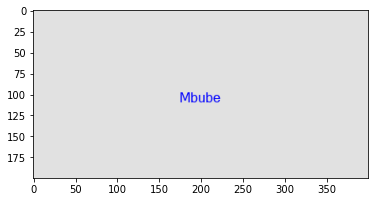

In [23]:
img_PIL = img_gray_PIL.copy()

org = (175,95) # x, y text location -- this requires a bit of trial and error
font_path = wdir + '\fonts\micross.ttf'
font_type = ImageFont.truetype(font_path, 16)
draw = ImageDraw.Draw(img_PIL).text(org, text, (0,0,255), font=font_type)
plt.imshow(img_PIL);

<a class="anchor" id="Img_Existing_Image_PIL"></a>
<h5>3.2.9 Drawing Shapes on an Existing Image with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing Shapes on an Existing Image with PIL


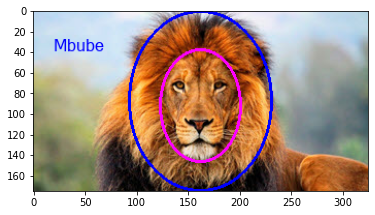

In [24]:
imgFile_PIL = os.getcwd() + '\images\lion.jpg'
img_PIL = PIL.Image.open(imgFile_PIL)

print("Drawing Shapes on an Existing Image with PIL")
draw = ImageDraw.Draw(img_PIL)
# first ellipse bounding box
x1 = img_PIL.width/2-40
y1 = img_PIL.height/2-50
x2 = img_PIL.width/2+40
y2 = img_PIL.height/2+60
draw.ellipse((x1,y1,x2,y2), outline = (255,0,255), width=3)

# second ellipse bounding box
x1 = img_PIL.width/2-70
y1 = 0
x2 = img_PIL.width/2+70
y2 = img_PIL.height
draw.ellipse((x1,y1,x2,y2), outline = (0,0,255), width=3)

org = (20,25) # text location
font_path = wdir + '\fonts\micross.ttf'
font_type = ImageFont.truetype(font_path, 16)
draw.text(org, text, (0,0,255), font=font_type)

plt.imshow(img_PIL);
#plt.axis('off')

<a class="anchor" id="Img_Shapes_SK"></a>
<h4>3.2 Using skimage to Draw Basic Shapes</h4>
<a href='#toc'>Return to TOC</a>

The 'skimage.draw' module provides a collection of basic shapes that can be added to an existing or new image. Among the basic shapes are lines, rectangles, circles, ellipses, and polygons. The following list provides an overview of the methods and their parameters used to draw the shapes and some of their variants. In general each shape has a 'filled' version along with an outline or 'perimeter' version.  

<ul>
    <li>bezier_curve(r0, c0, r1, c1, …) -- generate Bezier curve coordinates.</li>
    <li>circle_perimeter(r, c, radius) -- generate circle perimeter coordinates.</li>
    <li>circle_perimeter_aa(r, c, radius) -- generate anti-aliased circle perimeter coordinates. Only black and white.</li>
    <li>disk(center, radius, *[, shape]) -- generate coordinates of pixels within circle.</li>
    <li>ellipse(r, c, r_radius, c_radius) -- generate coordinates of pixels within ellipse.</li>
    <li>ellipse_perimeter(r, c, …[, …]) -- generate ellipse perimeter coordinates.</li>
    <li>ellipsoid(a, b, c[, spacing, …]) -- generates ellipsoid with semimajor axes aligned with grid dimensions on grid with specified spacing.</li>
    <li>line(r0, c0, r1, c1) -- generate line pixel coordinates.</li>
    <li>line_aa(r0, c0, r1, c1) -- generate anti-aliased line pixel coordinates. Only black and white.</li>
    <li>line_nd(start, stop, *[, …]) -- Draw a single-pixel thick line in n dimensions.</li>
    <li>polygon(r, c[, shape]) -- generate coordinates of pixels within polygon.</li>
    <li>polygon2mask(image_shape, polygon) -- Compute a mask from polygon.</li>
    <li>polygon_perimeter(r, c[, …]) -- generate polygon perimeter coordinates.</li>
    <li>random_shapes(image_shape, …) -- generate an image with random shapes, labeled with bounding boxes.</li>
    <li>rectangle(start[, end, extent, …]) -- generate coordinates of pixels within a rectangle.</li>
    <li>rectangle_perimeter(start[, …]) -- generate coordinates of pixels that are exactly around a rectangle.</li> 
</ul>

where

<ul>
    <li>r, c, r1, c1, ... -- refer to pairs of 'row and column' coordinates used to define the shape.</li> 
    <li>radius -- radius of the circle, ellipse or ellipsoid.</li>  
    <li>start, stop, end, extent -- pairs/tuples of coordinates used to define the starting, stopping, ending, or extent (aka length) coordinates of a shape</li>
    <li>image_shape -- pair/tuple of coordinates designating the row,column extent of an image array</li>  
</ul>

<a class="anchor" id="Img_SK"></a>
<h5>3.3.1 Creating a Image on which to Draw skimage Shapes</h5>
<a href='#toc'>Return to TOC</a>

shape -- rows by cols: (200, 400, 3)
height = 200
width = 400


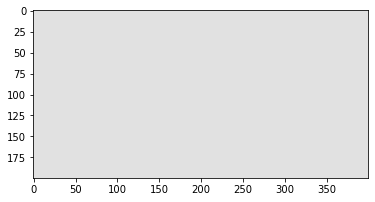

In [25]:
colr_gray = (225,225,225)
img_gray_sk = np.zeros ((200,400,3), dtype = "uint8") + colr_gray
print("shape -- rows by cols: {}".format(img_gray_sk.shape))
print("height = {}".format(img_gray_sk.shape[0]))
print("width = {}".format(img_gray_sk.shape[1]))
plt.imshow(img_gray_sk);
#plt.axis('off')

<a class="anchor" id="Img_Lines_SK"></a>
<h5>3.3.2 Drawing Lines with skimage.draw</h5>
<a href='#toc'>Return to TOC</a>

Drawing lines from corner to corner with skimage line


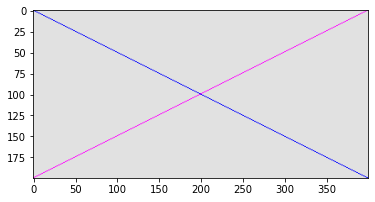

In [26]:
img = img_gray_sk.copy()
rr, cc = line(0, 0, 199, 399)
img[rr, cc] = (0, 0, 255) #blue
rr, cc = line(0, 399, 199, 0)
img[rr, cc] = (255, 0, 255) # magenta

print("Drawing lines from corner to corner with skimage line")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Rectangles_SK"></a>
<h4>3.3.3 Drawing Rectangles with skimage.draw</h4>
<a href='#toc'>Return to TOC</a>

Drawing one rectangle in perimeter form and another in filled form


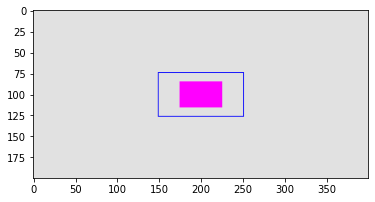

In [27]:
# rectangle(start[, end, extent, …])
# rectangle_perimeter(start[, …])

img = img_gray_sk.copy()

c_y = 100 # center Y of image with h = 200
c_x = 200 # center x of image with w = 400

# outline shape of rectangle
start = (c_y-25,c_x-50)
end = (c_y+25, c_x+50)
rr, cc = rectangle_perimeter(start, end)
img[rr, cc, :] = (0, 0, 255)

# filled rectangle
start = (c_y-15,c_x-25)
end = (c_y+15, c_x+25)
rr, cc = rectangle(start,end)
img[rr, cc, :] = (255, 0, 255) # magenta

print("Drawing one rectangle in perimeter form and another in filled form")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Circles_SK"></a>
<h4>3.3.4 Drawing Circle_Perimeters and Disks with skimage.draw</h4>
<a href='#toc'>Return to TOC</a>

Drawing disks and circle_perimeters with skimage


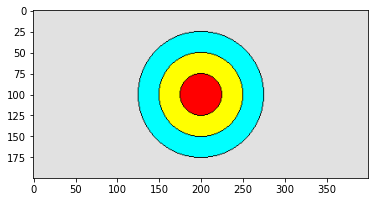

In [28]:
# circle_perimeter(r, c, radius)  -- outline of circle.</li>
# disk(center, radius, *[, shape]) -- filled circle.</li>

c_Y = 100
c_X = 200
cntr = (c_Y,c_X)

img = img_gray_sk.copy()

rr,cc = disk(cntr, 75)
img[rr, cc, :] = (0,255,255)
rr,cc =  circle_perimeter(c_Y, c_X, 75)
img[rr, cc, :] = (0,0,0)

rr,cc = disk(cntr, 50)
img[rr, cc, :] = (255,255,0)
rr,cc = circle_perimeter(c_Y, c_X, 50)
img[rr, cc, :] = (0,0,0)

rr,cc = disk(cntr, 25)
img[rr, cc, :] = (255,0,0)
rr,cc =  circle_perimeter(c_Y, c_X, 25)
img[rr, cc, :] = (0,0,0)

print("Drawing disks and circle_perimeters with skimage")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Ellipses_SK"></a>
<h4>3.3.5 Drawing Ellipses with skimage.draw</h4>
<a href='#toc'>Return to TOC</a>

Drawing ellipses with skimage


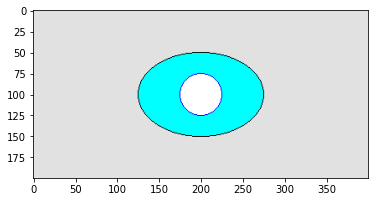

In [29]:
# ellipse(r, c, r_radius, c_radius) -- r_radius is the vertical radius, c_radius is horizontal
# ellipse_perimeter(r, c, …[, …])

img = img_gray_sk.copy()

c_Y = 100
c_X = 200

rr,cc = ellipse(c_Y, c_X, 50, 75)
img[rr, cc, :] = (0, 255, 255) # cyan

rr,cc = ellipse_perimeter(c_Y, c_X, 50, 75)
img[rr, cc, :] = (0, 0, 0) # black

rr,cc = ellipse(c_Y, c_X, 25, 25)
img[rr, cc, :] = (255, 255, 255) # white

rr,cc = ellipse_perimeter(c_Y, c_X, 25, 25)
img[rr, cc, :] = (0, 0, 255) # blue

print("Drawing ellipses with skimage")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Polygons_SK"></a>
<h4>3.3.6 Drawing Polygons with skimage.draw</h4>
<a href='#toc'>Return to TOC</a>

Drawing Polygons and Polygon Perimeters with skimage


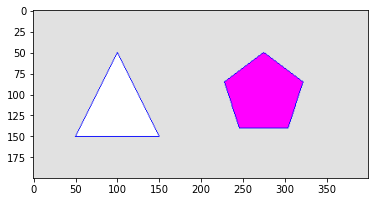

In [30]:
# polygon(r, c[, shape])
# polygon_perimeter(r, c[, …]) 

# source: modified version of https://www.101computing.net/pentagram-challenge/
def equal_sided_poly(sides, cY, cX, radius, start_ang):
    point_list = []
    increment_ang = int(360/sides)
    for n in range(0,sides):
        y = cY + int(radius*math.sin(math.radians(start_ang + n * increment_ang)))
        x = cX + int(radius*math.cos(math.radians(start_ang + n * increment_ang)))
        point_list.append([y,x])
    return np.array(point_list)

img = img_gray_sk.copy()

# coordinates for equilateral triangle
r = np.array([150, 50, 150])
c = np.array([50, 100, 150])

rr, cc = polygon(r, c)
img[rr, cc, :] = (255,255,255) # white body
rr, cc = polygon_perimeter(r, c)
img[rr, cc, :] = (0,0,255) # blue outline

# pentagon example
poly_arr = equal_sided_poly(5, 100, 275, 50, 270) 
rr,cc = polygon(poly_arr[:,0],poly_arr[:,1])
img[rr, cc, :] = (255,0,255) # magenta body
rr,cc = polygon_perimeter(poly_arr[:,0],poly_arr[:,1])
img[rr, cc, :] = (0,0,255) # blue outline

print("Drawing Polygons and Polygon Perimeters with skimage")
plt.imshow(img);
#plt.axis('off')

<a class="anchor" id="Img_Text_SK"></a>
<h5>3.3.7 Annotating an skimage Image with Text</h5>
<a href='#toc'>Return to TOC</a>

Unlike 'cv2' and 'PIL', the 'skimage' library does not directly support text annotation. Instead, there are a couple of alternatives. First, you could use either 'cv2' putText or 'PIL' ImageDraw.text to handle the tasks. Second, matplotlib supports image annotation with 'matplotlib.pyplot.text' (typically abbreviated 'plt.text'. There is a long laundry list of parameters associated with this text method but the basic elements are:

    plt.text(x, y, text, fontsize=None, color=None)
    
where x, y are the lower-left coordinates, fontsize is the size of the font, and color is a literal font color. In addition to specifying parameters individually, it's also possible to create a dictionary of parameter values and substitute the dictionary.

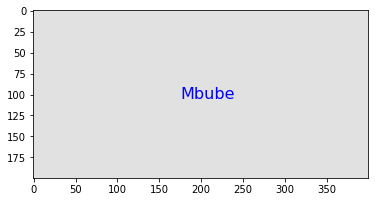

In [31]:
img = img_gray_sk.copy()
font_props = dict(size=16, color='blue')
plt.text(175,105,'Mbube', font_props)
plt.imshow(img);

<a class="anchor" id="Img_Existing_Image_SK"></a>
<h5>3.3.8 Drawing Shapes on an Existing Image with skimage</h5>
<a href='#toc'>Return to TOC</a>

Drawing Shapes on an Existing Image


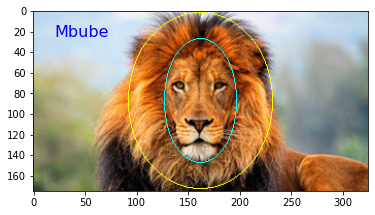

In [32]:
img_file_sk = os.getcwd() + '\images\lion.jpg'
img_sk = skio.imread(img_file_sk)

img = img_sk.copy()
print("Drawing Shapes on an Existing Image")

# first ellipse bounding box
cx = int(img.shape[1]/2)
cy = int(img.shape[0]/2)
rr,cc = ellipse_perimeter(cy, cx, 60, 35)
img[rr,cc] = (0,255,255)

# second ellipse bounding box
rr,cc = ellipse_perimeter(cy,cx,85,70)
img[rr,cc] = (255,255,0)

plt.text(20, 25, 'Mbube', fontsize=16, color = 'blue')
plt.imshow(img);
#plt.axis('off')

As this last image shows, unlike either the cv2 or PIL shapes, there is no direct way to control the width of the outlines. Often, this makes it difficult to see dark lines unless the background is much lighter and vice-versa. 

<a class="anchor" id="Remarks"></a>
<h3>4. Concluding Remarks</h3>
<a href='#toc'>Return to TOC</a>

The next phase of 'Image Processing and Computer Vision' we'll turn our attention pre-processing transformation, enhancements and restorations.'